<a href="https://colab.research.google.com/github/MohnishJain/Credit-Card-Risk-Asessment/blob/master/CreditCardRiskAsessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0-rc0
!pip install mlxtend==0.17.0

     |████████████████████████████████| 380.5MB 54kB/s 
     |████████████████████████████████| 4.3MB 33.0MB/s 
     |████████████████████████████████| 501kB 35.5MB/s 
     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Conv1D,MaxPool1D,MaxPool2D,Dropout,BatchNormalization,ZeroPadding2D,Flatten
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_confusion_matrix,plot_learning_curves,plot_sequential_feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import roc_auc_score , accuracy_score , classification_report , auc , roc_auc_score , confusion_matrix
print(tf.__version__)
%matplotlib inline

2.0.0-rc0


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ANN/CreditCardRiskAsessment/Credit_default_dataset.csv')
df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2  ...       0.0       0.0                           1
1   2   120000.0    2  ...       0.0    2000.0                           1
2   3    90000.0    2  ...    1000.0    5000.0                           0
3   4    50000.0    2  ...    1069.0    1000.0                           0
4   5    50000.0    1  ...     689.0     679.0                           0

[5 rows x 25 columns]

In [0]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [0]:
df.describe()

ID       LIMIT_BAL  ...       PAY_AMT6  default.payment.next.month
count  30000.000000    30000.000000  ...   30000.000000                30000.000000
mean   15000.500000   167484.322667  ...    5215.502567                    0.221200
std     8660.398374   129747.661567  ...   17777.465775                    0.415062
min        1.000000    10000.000000  ...       0.000000                    0.000000
25%     7500.750000    50000.000000  ...     117.750000                    0.000000
50%    15000.500000   140000.000000  ...    1500.000000                    0.000000
75%    22500.250000   240000.000000  ...    4000.000000                    0.000000
max    30000.000000  1000000.000000  ...  528666.000000                    1.000000

[8 rows x 25 columns]

In [0]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [0]:
df.rename(columns= {'default.payment.next.month' : 'Defaulter' , 'PAY_0' : 'PAY_1'}  , inplace = True)

In [0]:
df.drop('ID' , axis= 1 , inplace = True)

In [0]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  Defaulter
0    20000.0    2          2         1  ...       0.0       0.0       0.0          1
1   120000.0    2          2         2  ...    1000.0       0.0    2000.0          1
2    90000.0    2          2         2  ...    1000.0    1000.0    5000.0          0
3    50000.0    2          2         1  ...    1100.0    1069.0    1000.0          0
4    50000.0    1          2         1  ...    9000.0     689.0     679.0          0

[5 rows x 24 columns]

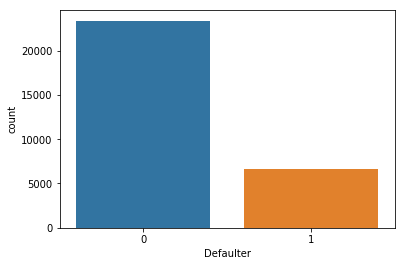

In [0]:
sns.countplot('Defaulter' , data = df)

In [0]:
pd.get_dummies(df , columns=['SEX' , 'EDUCATION' , 'MARRIAGE'] ,drop_first=True )

LIMIT_BAL  AGE  PAY_1  ...  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3
0        20000.0   24      2  ...           1           0           0
1       120000.0   26     -1  ...           0           1           0
2        90000.0   34      0  ...           0           1           0
3        50000.0   37      0  ...           1           0           0
4        50000.0   57     -1  ...           1           0           0
5        50000.0   37      0  ...           0           1           0
6       500000.0   29      0  ...           0           1           0
7       100000.0   23      0  ...           0           1           0
8       140000.0   28      0  ...           1           0           0
9        20000.0   35     -2  ...           0           1           0
10      200000.0   34      0  ...           0           1           0
11      260000.0   51     -1  ...           0           1           0
12      630000.0   41     -1  ...           0           1           0
13       70000.0   30      1  ...           0           1           0
14      250000.0   29      0  ...           0           1           0
15       50000.0   23      1  ...           0           0           1
16       20000.0   24      0  ...           0           1           0
17      320000.0   49      0  ...           1           0           0
18      360000.0   49      1  ...           1           0           0
19      180000.0   29      1  ...           0           1           0
20      130000.0   39      0  ...           0           1           0
21      120000.0   39     -1  ...           1           0           0
22       70000.0   26      2  ...           0           1           0
23      450000.0   40     -2  ...           1           0           0
24       90000.0   23      0  ...           0           1           0
25       50000.0   23      0  ...           0           1           0
26       60000.0   27      1  ...           0           1           0
27       50000.0   30      0  ...           0           1           0
28       50000.0   47     -1  ...           1           0           0
29       50000.0   26      0  ...           0           1           0
...          ...  ...    ...  ...         ...         ...         ...
29970   360000.0   34     -1  ...           1           0           0
29971    80000.0   36      0  ...           1           0           0
29972   190000.0   37      0  ...           1           0           0
29973   230000.0   35      1  ...           1           0           0
29974    50000.0   37      1  ...           1           0           0
29975   220000.0   41      0  ...           1           0           0
29976    40000.0   47      2  ...           0           1           0
29977   420000.0   34      0  ...           0           1           0
29978   310000.0   39      0  ...           1           0           0
29979   180000.0   32     -2  ...           1           0           0
29980    50000.0   42      0  ...           0           1           0
29981    50000.0   44      1  ...           1           0           0
29982    90000.0   36      0  ...           1           0           0
29983    20000.0   44     -2  ...           1           0           0
29984    30000.0   38     -1  ...           0           1           0
29985   240000.0   30     -2  ...           0           1           0
29986   360000.0   35     -1  ...           0           1           0
29987   130000.0   34      0  ...           0           1           0
29988   250000.0   34      0  ...           1           0           0
29989   150000.0   35     -1  ...           0           1           0
29990   140000.0   41      0  ...           1           0           0
29991   210000.0   34      3  ...           1           0           0
29992    10000.0   43      0  ...           1           0           0
29993   100000.0   38      0  ...           0           1           0
29994    80000.0   34      2  ...           0           1           0
29995   220000.0 

In [0]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  Defaulter
0    20000.0    2          2         1  ...       0.0       0.0       0.0          1
1   120000.0    2          2         2  ...    1000.0       0.0    2000.0          1
2    90000.0    2          2         2  ...    1000.0    1000.0    5000.0          0
3    50000.0    2          2         1  ...    1100.0    1069.0    1000.0          0
4    50000.0    1          2         1  ...    9000.0     689.0     679.0          0

[5 rows x 24 columns]

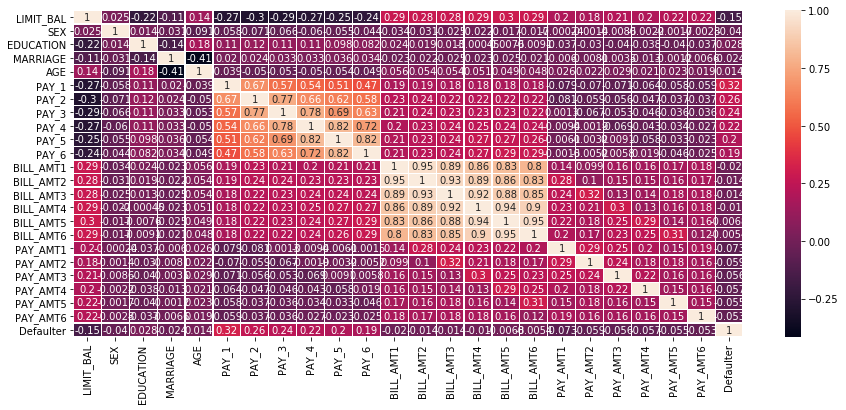

In [0]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr() , annot=True , linewidths=0.3 )

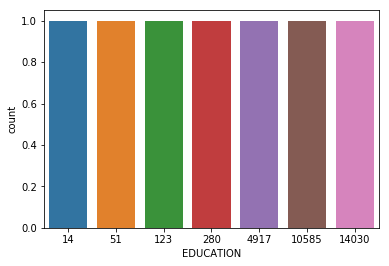

In [0]:
sns.countplot(df.EDUCATION.value_counts())

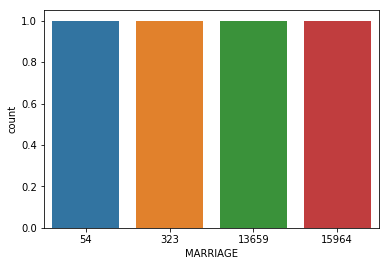

In [0]:
sns.countplot(df.MARRIAGE.value_counts())

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


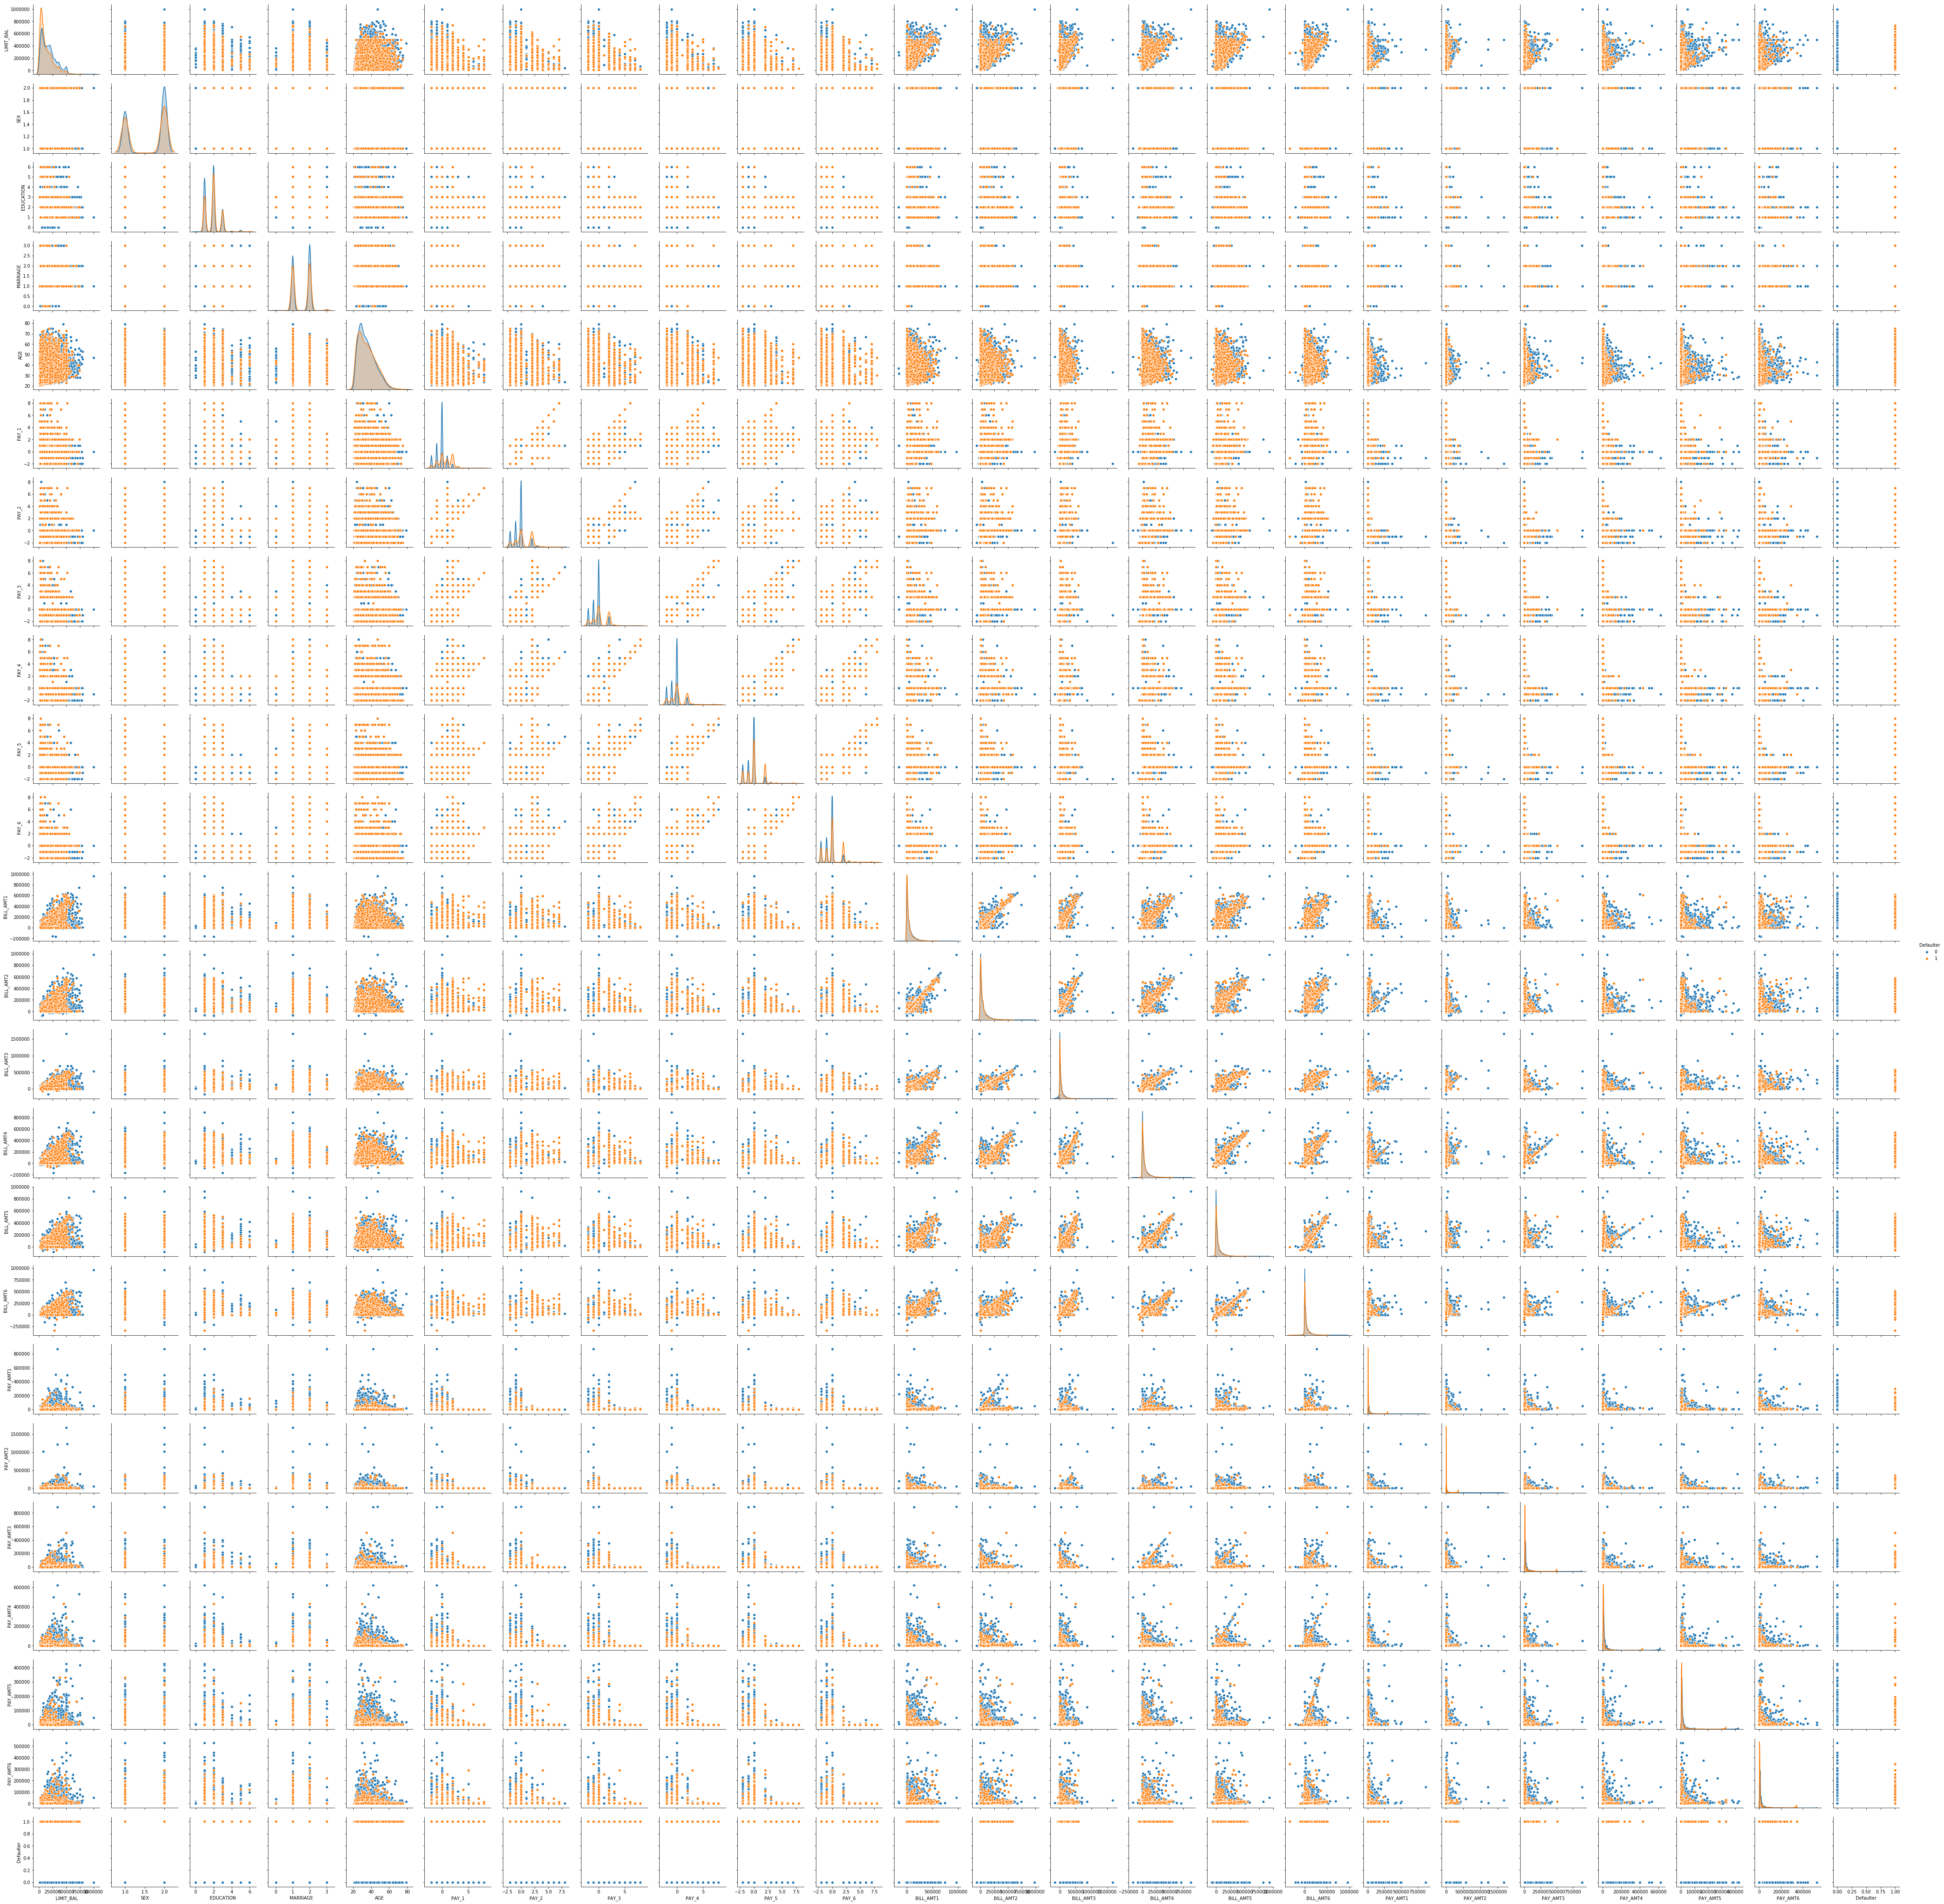

In [0]:
sns.pairplot(data = df , hue = 'Defaulter')

In [0]:
y= df['Defaulter']
X = df.drop('Defaulter' , axis = 1)



In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


#Gradiant Boosting Model

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score


In [0]:
clf = GradientBoostingClassifier(random_state=10)
#Fit algorithm on Data
clf.fit(X , y)
#Predict training data:
y_pred = clf.predict(X)
y_pred_prob = clf.predict_proba(X)[:,1]

#Perform Cross - Validation"
cv_score = cross_val_score(clf , X, y , cv= 5 , scoring='roc_auc')
#Print Model Report:
print("Model report")
print("Accuracy : " , accuracy_score(y ,y_pred ) * 100)
print("ROC_AUC Score : " , roc_auc_score(y ,y_pred_prob )* 100)

Model report
Accuracy :  82.56
ROC_AUC Score :  80.21225352337238


**HyperParameter Tuning Test 1**

In [0]:
param_test1 = {'n_estimators' : range(20 ,81 ,10)}
gridsearch1 = GridSearchCV(estimator =  GradientBoostingClassifier(learning_rate = 0.1 ,subsample = 0.85 ,  min_samples_split= 200 , min_samples_leaf= 50 , max_depth= 8 ,max_features='sqrt' ) , param_grid=param_test1 , scoring ='roc_auc' ,n_jobs=4,iid = False,cv = 5)
gridsearch1.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=200,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [0]:
gridsearch1.best_estimator_,gridsearch1.best_score_,gridsearch1.best_params_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=8,
                            max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=50, min_samples_split=200,
                            min_weight_fraction_leaf=0.0, n_estimators=50,
                            n_iter_no_change=None, presort='auto',
                            random_state=None, subsample=0.85, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 0.7827465417783109,
 {'n_estimators': 50})

**HyperParameter Tuning Test 2**

In [0]:
param_test2 = {'max_depth' : range(5 ,16 ,2) , 'min_samples_split': range(200,1000,200)}
gridsearch2 = GridSearchCV(estimator =  GradientBoostingClassifier(n_estimators = 50 ,learning_rate = 0.1 ,subsample = 0.85  , min_samples_leaf= 50 ,max_features='sqrt' ) , param_grid=param_test2 , scoring ='roc_auc' ,n_jobs=4,iid = False,cv = 5 )
gridsearch2.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50,
                                                  n_iter_no_change=None,
                                                  presor

In [0]:
gridsearch2.best_score_,gridsearch2.best_params_

(0.78357974161781, {'max_depth': 7, 'min_samples_split': 800})

In [0]:
param_test3 = {'min_samples_leaf' : range(30,71,10), 'max_features' : range(4,20,2)}
gridsearch3 = GridSearchCV(estimator =  GradientBoostingClassifier(n_estimators = 50 ,learning_rate = 0.1 ,subsample = 0.85 , max_depth = 7, min_samples_split = 800  ) , param_grid=param_test3 , scoring ='roc_auc' ,n_jobs=4,iid = False,cv = 5 , return_train_score= True)
gridsearch3.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=7,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=800,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50,
                                                  n_iter_no_change=None,
                                                  presort

In [0]:
gridsearch3.best_score_,gridsearch3.best_params_

(0.7840231553710101, {'max_features': 10, 'min_samples_leaf': 50})

**HyperParameter Tuning Test 3**

In [0]:
param_test4 = {'subsample': [0.6,0.7,0.75,0.8,0.85,0.9]}
gridsearch4 = GridSearchCV(estimator =  GradientBoostingClassifier(n_estimators = 50 ,learning_rate = 0.1 , max_depth = 7, min_samples_split = 800 ,max_features= 10,min_samples_leaf=50 ) , param_grid=param_test4 , scoring ='roc_auc' ,n_jobs=4,iid = False,cv = 5 )
gridsearch4.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=7,
                                                  max_features=10,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=800,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50,
                                                  n_iter_no_change=None,
                                                  presort=

In [0]:
gridsearch4.best_score_,gridsearch4.best_params_

(0.7841955598303739, {'subsample': 0.8})

**Using the Parameters obtained from HyperParameter Tuning**


In [0]:

clf = GradientBoostingClassifier(n_estimators = 50 ,learning_rate = 0.1 , subsample = 0.80 ,max_depth = 7, min_samples_split = 800 ,max_features= 10,min_samples_leaf=50 )
#Fit algorithm on Data
clf.fit(X , y)
#Predict training data:
y_pred = clf.predict(X)
y_pred_prob = clf.predict_proba(X)[:,1]

#Perform Cross - Validation"
cv_score = cross_val_score(clf , X, y , cv= 5 , scoring='roc_auc')
#Print Model Report:
print("Model report")
print("Accuracy : " , accuracy_score(y ,y_pred ) * 100)
print("ROC_AUC Score : " , roc_auc_score(y ,y_pred_prob )* 100)

Model report
Accuracy :  82.78999999999999
ROC_AUC Score :  81.64182486484567


Text(0.5, 1.0, 'Fetaure Importances')

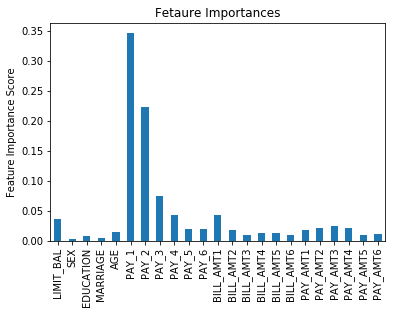

In [0]:
imp_features=  clf.feature_importances_
feat_imp = pd.Series(imp_features ,df.columns[:-1])
feat_imp.plot.bar()
plt.ylabel("Feature Importance Score")
plt.title("Fetaure Importances")




(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f88927c71d0>)

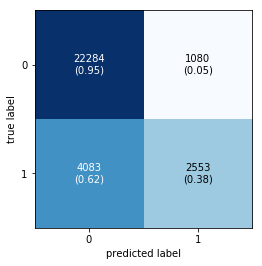

In [0]:
plot_confusion_matrix(confusion_matrix(y ,y_pred ),show_normed=True )

#BUILD ANN

In [0]:
X = np.asarray(X)
y = np.asarray(y)

In [0]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)

In [0]:
model = Sequential()
model.add(Dense(8 , activation='relu' , kernel_initializer='he_uniform' , input_shape = (X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(8 , activation='relu' , kernel_initializer='he_uniform' ))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid' ))


early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:0.22, 1:1-0.22}


In [0]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy' , metrics=['accuracy'] )

In [0]:

model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 8)                 192       
_________________________________________________________________
batch_normalization_68 (Batc (None, 8)                 32        
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_69 (Batc (None, 8)                 32        
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 9         
Total params: 337
Trainable params: 305
Non-trainable params: 32
_________________________________________________________________


In [0]:
historyANN = model.fit(X_train, y_train , validation_split= 0.2 , epochs=20 , verbose= 2 , callbacks= [early_stopping_monitor])


Train on 16800 samples, validate on 4200 samples
Epoch 1/20
16800/16800 - 5s - loss: 0.4462 - accuracy: 0.8114 - val_loss: 0.4337 - val_accuracy: 0.8155
Epoch 2/20
16800/16800 - 5s - loss: 0.4457 - accuracy: 0.8135 - val_loss: 0.4321 - val_accuracy: 0.8162
Epoch 3/20
16800/16800 - 5s - loss: 0.4457 - accuracy: 0.8139 - val_loss: 0.4311 - val_accuracy: 0.8169
Epoch 4/20
16800/16800 - 5s - loss: 0.4429 - accuracy: 0.8154 - val_loss: 0.4323 - val_accuracy: 0.8152
Epoch 5/20
16800/16800 - 5s - loss: 0.4444 - accuracy: 0.8139 - val_loss: 0.4327 - val_accuracy: 0.8174


In [0]:
def plot_learningCurve(history , counter):
  epoch_range = range(1,counter)
  plt.plot(epoch_range , history.history['accuracy'])
  plt.plot(epoch_range , history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()

  plt.plot(epoch_range , history.history['loss'])
  plt.plot(epoch_range , history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'Val'], loc = 'upper left')
  plt.show()

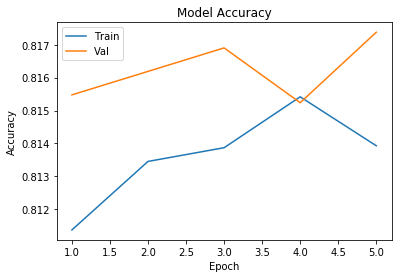

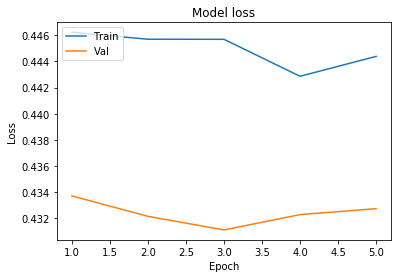

In [0]:
plot_learningCurve(historyANN , len(historyANN.epoch)+ 1)


#convolution 1D

In [0]:
 X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
 X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [0]:
model = Sequential()
model.add(Conv1D(32 , 3 , activation='relu' , kernel_initializer='he_uniform' , input_shape = (X_train.shape[1],1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64,3 , activation='relu' , kernel_initializer='he_uniform' ))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(128,3 , activation='relu' , kernel_initializer='he_uniform' ))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation='relu' , kernel_initializer='he_uniform' ))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid' ))



early_stopping_monitor = EarlyStopping(patience=4)

In [0]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 21, 32)            128       
_________________________________________________________________
batch_normalization_73 (Batc (None, 21, 32)            128       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 10, 32)            0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 10, 32)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 8, 64)             6208      
_________________________________________________________________
batch_normalization_74 (Batc (None, 8, 64)             256       
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 4, 64)           

In [0]:
model.compile(optimizer=Adam(), loss='binary_crossentropy' , metrics=['accuracy'])

In [0]:
historyCNN = model.fit(X_train , y_train , epochs=20 , verbose= 2 ,validation_split=0.1 ,callbacks= [early_stopping_monitor])

Train on 18900 samples, validate on 2100 samples
Epoch 1/20
18900/18900 - 7s - loss: 0.5973 - accuracy: 0.7586 - val_loss: 0.4535 - val_accuracy: 0.8081
Epoch 2/20
18900/18900 - 5s - loss: 0.4834 - accuracy: 0.7934 - val_loss: 0.4531 - val_accuracy: 0.8095
Epoch 3/20
18900/18900 - 5s - loss: 0.4725 - accuracy: 0.7968 - val_loss: 0.4451 - val_accuracy: 0.8052
Epoch 4/20
18900/18900 - 6s - loss: 0.4670 - accuracy: 0.8007 - val_loss: 0.4389 - val_accuracy: 0.8090
Epoch 5/20
18900/18900 - 6s - loss: 0.4638 - accuracy: 0.8023 - val_loss: 0.4375 - val_accuracy: 0.8119
Epoch 6/20
18900/18900 - 6s - loss: 0.4600 - accuracy: 0.8013 - val_loss: 0.4381 - val_accuracy: 0.8057
Epoch 7/20
18900/18900 - 5s - loss: 0.4580 - accuracy: 0.8079 - val_loss: 0.4371 - val_accuracy: 0.8110
Epoch 8/20
18900/18900 - 5s - loss: 0.4546 - accuracy: 0.8050 - val_loss: 0.4337 - val_accuracy: 0.8114
Epoch 9/20
18900/18900 - 5s - loss: 0.4564 - accuracy: 0.8061 - val_loss: 0.4348 - val_accuracy: 0.8124
Epoch 10/20
189

In [0]:
pred_conv = model.predict(X_test)

In [0]:
y_test = y_test.reshape(y_test.shape[0], -1)

In [0]:

y_test.shape , pred_conv.shape

((9000, 1), (9000, 1))

In [0]:
pred_conv_prob = model.predict_proba(X_test)
pred_conv_prob.shape

(9000, 1)

In [0]:
print("Accuracy Score on test Set" ,accuracy_score(y_test,pred_conv.round()) * 100)
print("ROC -AUC Score on test Set" ,roc_auc_score(y_test,pred_conv_prob) * 100)

Accuracy Score on test Set 81.53333333333333
ROC -AUC Score on test Set 76.59753253869312


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8865f2ef98>)

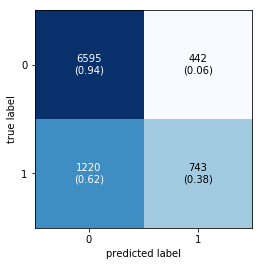

In [0]:
plot_confusion_matrix(confusion_matrix(y_test ,pred_conv.round() ),show_normed=True )

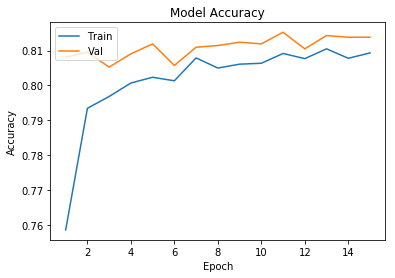

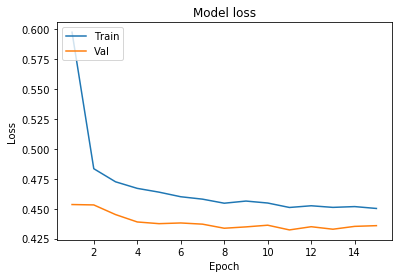

In [0]:
plot_learningCurve(historyCNN , len(historyCNN.epoch)+ 1)
